# Build your first Machine Learning pipeline using scikit-learn!

Link to the [tutorial](https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)

**Overview**  
- Understand the structure of a Machine Learning Pipeline
- Build an end-to-end ML pipeline on a real-world data
- Train a Random Forest Regressor for sales prediction

Creating a machine learning pipeline that remembers the complete set of preprocessing steps in the exact same order. So that whenever any new data point is introduced, the machine learning pipeline performs the steps as defined and uses the model to predict the target variable.

**Table of Contents**

1. Understanding Problem Statement
2. Building a prototype model
    1. Data Exploration and Preprocessing
       1. Impute the missing values
       2. Encode the categorical variables
       3. Normalize/Scale the data if required
    2. Model Building
    3. Identifying features to predict the target
3. Designing the ML Pipeline using the best model
4. Predict the target on the unseen data.

## Understanding Problem Statement

As a part of this problem, we are provided with the information about the stores (location, size, etc), products (weight, category, price, etc) and historical sales data. Using this information, we have to forecast the sales of the products in the stores.

You can read the detailed problem statement and download the dataset from here. Below is the complete set of features in this data.The target variable [here](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/) is the Item_Outlet_Sales.

**Problem statement** 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Data**  

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

## Building a prototype model

The main idea behind building a prototype is to understand the data and necessary preprocessing steps required before the model building process. Based on our learning from the prototype model, we will design a machine learning pipeline that covers all the essential preprocessing steps.

## Data Exploration and Preprocessing

We will explore the data, go through the individual variables, and clean the data to make it ready for the model building process.  

We will explore the variables and find out the mandatory preprocessing steps required for the given data. Let us start by checking if there are any missing values in the data. We will use the isnull().sum() function here

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the train data
train_data = pd.read_csv('./data/train_Big_Mart_Sales_3.csv')

# check for null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – `Item_Weight` and `Outlet_Size`.

Since `Item_Weight` is a continuous variable, we can use either **mean** or **median** to impute the missing values. On the other hand, `Outlet_Size` is a categorical variable and hence we will replace the missing values by the **mode** of the column. You can try different methods to impute missing values as well.

In [3]:
# impute missing values in item weights by mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(), inplace=True)

# impute missing values in Outlet Size by mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0], inplace=True)

In [4]:
# re-check for null values
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Most ML models cannot handle missing values on their own. Thus imputing missing values becomes a necessary preprocessing step.  

ML models  cannot work with categorical (string) data as well, specifically scikit-learn. Before building a machine learning model, we need to convert the categorical variables into numeric types. Let us do that.

## Encode the categorical variables

Let's first check the categorical variables that we have by using `train_data.dtypes()` to get all of our data types.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# get data types
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# leave only categorical data types
train_data.dtypes[train_data.dtypes == "object"]

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

We have 7 categorical variables as shown above.

There are a number of ways in which we can convert these categories into numerical values. You can read about the same in this article – [Simple Methods to deal with Categorical Variables](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/). We are going to use the categorical_encoders library in order to convert the variables into binary columns.

Note that in this example I am not going to encode Item_Identifier since it will increase the number of feature to 1500. This feature  can be used in other ways ([read here](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/)), but to keep the model simple, I will not use this feature here.

In [8]:
import category_encoders as ce

# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'], use_cat_names=True)

# encode the categorical variables
train_data = OHE.fit_transform(train_data)

In [9]:
len(list(train_data.columns))

47

In [10]:
list(train_data.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Fat_Content_low fat',
 'Item_Fat_Content_LF',
 'Item_Fat_Content_reg',
 'Item_Visibility',
 'Item_Type_Dairy',
 'Item_Type_Soft Drinks',
 'Item_Type_Meat',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Household',
 'Item_Type_Baking Goods',
 'Item_Type_Snack Foods',
 'Item_Type_Frozen Foods',
 'Item_Type_Breakfast',
 'Item_Type_Health and Hygiene',
 'Item_Type_Hard Drinks',
 'Item_Type_Canned',
 'Item_Type_Breads',
 'Item_Type_Starchy Foods',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_MRP',
 'Outlet_Identifier_OUT049',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT019',
 'Outlet_Establishment_Year',
 'Outlet_Size_Medium',
 'Outlet_Size_High',
 'Outlet_Size_Small',
 'Outlet

## Scale the data

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar. You can do this easily in python using the `StandardScaler` function.

In [11]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


In [12]:
from sklearn.preprocessing import StandardScaler

# create an object of the StandardScaler
scaler = StandardScaler()

# fit with the Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

# transform the data
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [13]:
train_data.Item_MRP

0       1.747454
1      -1.489023
2       0.010040
3       0.660050
4      -1.399220
          ...   
8518    1.180783
8519   -0.527301
8520   -0.897208
8521   -0.607977
8522   -1.052261
Name: Item_MRP, Length: 8523, dtype: float64

## Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression and Random Forest Regressor to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [14]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variables
train_X = train_data.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y, test_size=0.25, random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

We now have our train and validation sets ready. Let us train a linear regression model on this data and check it’s performance on the validation set. To check the model performance, we are using RMSE as an evaluation metric.

We will train our model using Linear regression and we will check the model performance by using RMSE as an evaluation metric.

In [17]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_LR.predict(train_x)
predict_test = model_LR.predict(test_x)

# Root Mean Squared Error on train and test data
print("RMSE on train data:", mean_squared_error(train_y, predict_train)**0.5)
print("RMSE on test data:", mean_squared_error(test_y, predict_test)**0.5)

RMSE on train data: 1120.4078429065073
RMSE on test data: 1148.7501386734484


The linear regression model has a very high RMSE value on both training and validation data. Let us see if a tree based model performs better in this case. Here we will train a random forest and to check if we get any improvement in the train and validation errors.

In [18]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print("RMSE on train data:", mean_squared_error(train_y, predict_train)**0.5)
print("RMSE on test data:", mean_squared_error(test_y, predict_test)**0.5)

RMSE on train data: 898.6591402571304
RMSE on test data: 1117.4482657946544


As you can see, there is a significant improvement on is the RMSE values. You can train more complex models like Gradient Boosting and XGBoost, and see if the RMSE value further improves.

A very interesting feature of the random forest algorithm is that it gives you the **‘feature importance’** for all the variables in the data. Let us see how can we use this attribute to make our model simpler and better!

## Feature Importance

After the preprocessing and encoding steps, we had a total of 45 features and not all of these may be useful in forecasting the sales. Alternatively we can select the top 5 or top 7 features, which had the major contribution in forecasting sales values.

If the model performance is similar in both the cases, that is – by using 45 features and by using 5-7 features, then we should use only the top 7 features, in order to keep the model more simple and efficient.

>The idea is to have a less complex model without compromising on the overall model performance.

Plot the n most important features of a random forest model.

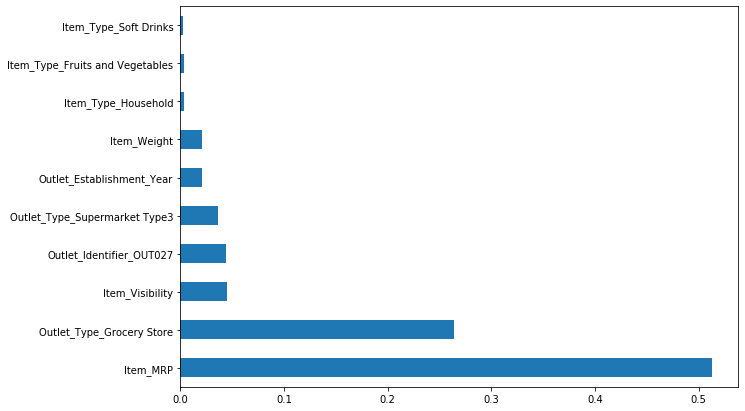

In [20]:
# plot the 10 most important features
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(model_RFR.feature_importances_, index=train_x.columns)
feat_importances.nlargest(10).plot(kind='barh');

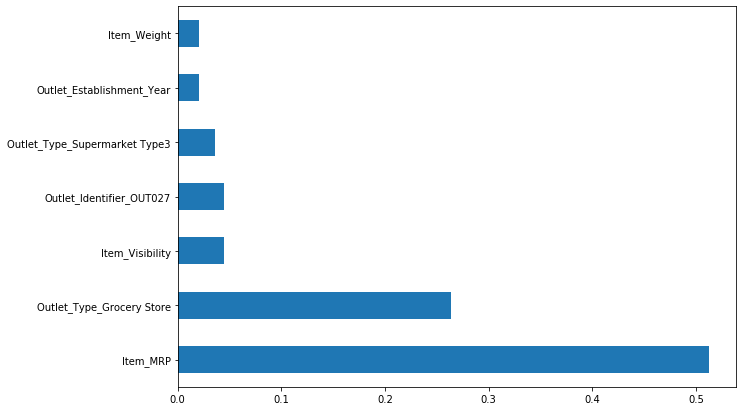

In [19]:
# plot the 7 most important features
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(model_RFR.feature_importances_, index=train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [24]:
feat_importances.sort_values()

Outlet_Identifier_OUT010           0.000005
Outlet_Identifier_OUT019           0.000010
Outlet_Size_High                   0.000279
Item_Type_Others                   0.000301
Outlet_Identifier_OUT013           0.000492
Outlet_Size_Medium                 0.000710
Outlet_Type_Supermarket Type2      0.000787
Item_Fat_Content_reg               0.000891
Outlet_Size_Small                  0.000925
Item_Fat_Content_low fat           0.000961
Outlet_Location_Type_Tier 2        0.000982
Outlet_Identifier_OUT018           0.001025
Outlet_Identifier_OUT046           0.001038
Outlet_Location_Type_Tier 1        0.001144
Item_Type_Breads                   0.001191
Outlet_Identifier_OUT045           0.001295
Outlet_Location_Type_Tier 3        0.001326
Outlet_Identifier_OUT049           0.001345
Item_Type_Hard Drinks              0.001391
Item_Type_Meat                     0.001457
Outlet_Identifier_OUT035           0.001511
Outlet_Identifier_OUT017           0.001618
Item_Type_Seafood               

Now, we are going to train the same random forest model using these 7 features only and observe the change in RMSE values for the train and the validation set.

In [28]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# create an object of RandomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10, random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.9500257797899
RMSE on test data:  1117.3398212310208


Now, this is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 45 features. Let us identify the final set of features that we need and the preprocessing steps for each of them.

## Identifying features to build ML pipeline

We are now familiar with the data, we have performed required preprocessing steps, and built a machine learning model on the data. At this stage we must list down the final set of features and necessary preprocessing steps (for each of them) to be used in the machine learning pipeline.

### Selected Features and Preprocessing Steps  

- **Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale this values.
- **Outlet_Type_Grocery_Store:** A binary column which indicates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 ( if outlet type is something else).
- **Item_Visibility:** Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we didn’t apply any preprocessing steps on this variable.
- **Outlet_Type_Supermarket_Type3:** Another binary column indicating if the outlet type is a “supermarket_type_3” or not. To capture this information we will create binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (othewise).
- **Outlet_Identifier_OUT027:** This feature specifies whether the outlet identifier is “OUT027” or not. Similar to the last previous example, we will create a separate column that carries 1 (if outlet type is grocery store) and 0 (otherwise).
- **Outlet_Establishment_Year:** The Outlet_Establishment_Year describes year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline as well.
- **Item_Weight:** During the preprocessing steps we observed that Item_Weight had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the machine learning pipeline.  


Apart from these 7 columns, we will drop the rest of the columns since we will not use them to train the model. Let us go ahead and design our ML pipeline!

In [34]:
train_x[['Outlet_Identifier_OUT027']]

,Outlet_Identifier_OUT027
3865,0
6191,0
5584,0
5388,0
1484,0
...,...
4373,0
7891,1
4859,0
3264,0


## Pipeline Design

In the last section we built a prototype to understand the preprocessing requirement for our data. It is now time to form a pipeline design based on our learning from the last section. We will define our pipeline in three stages:

    1. Create the required binary features
    2. Perform required data preprocessing and transformations
    3. Build a model to predict the sales

<img src='./resources/final_pipeline.webp'>

### Create the required binary features

We will create a custom transformer that will add 3 new binary columns to the existing data.

- Outlet_Type : Grocery Store
- Outlet_Type : Supermarket Type3
- Outlet_Identifier_OUT027

### Data Preprocessing and transformations.

We will use a ColumnTransformer to do the required transformations. It will contain 3 steps.

- Drop the columns that are not required for model training
- Impute missing values in the column *Item_Weight* using the average
- Scale the column *Item_MRP* using  `StandardScaler()`

### Use the model to predict the target on the cleaned data

This will be the final step in the pipeline. In the last two steps we preprocessed the data and made it ready for the model building process. Finally, we will use this data and build a machine learning model to predict the *Item Outlet Sales*.

Let’s code each step of the pipeline on the BigMart Sales data.

## Building Pipeline

First of all, we will read the data set and separate the independent and target variable from the training dataset.

In [35]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [40]:
# read the training data set
data = pd.read_csv('./data/train_Big_Mart_Sales_3.csv')

# top rows of the data
data.head()

# seperate the independent and target variables
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

In [37]:
# top rows of the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[More](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) on `ColumnTransformer`.

Now, as a first step, we need to create 3 new binary columns using a custom transformer. Here are the steps we need to follow to create a custom transformer.

- Define a class **OutletTypeEncoder**
- Add the parameter **BaseEstimator** while defining the class
- The class must contain fit and transform methods

In the transform method, we will define all the 3 columns that we want after the first stage in our ML pipeline.

In [45]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):
    
    def __init__(self):
        pass
    
    def fit(self, documents, y=None):
        return self
    
    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type']=='Grocery Store')*1
        x_dataset['oulet_supermarket_3'] = (x_dataset['Outlet_Type']=='Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Type']=='OUT027')*1
        return x_dataset

Next we will define the pre-processing steps required before the model building process.

- Drop the columns – Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, - Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year
- Impute missing values in column Item_Weight with mean
- Scale the column Item_MRP using StandardScaler().

This will be the second step in our machine learning pipeline. After this step, the data will be ready to be used by the model to make predictions.

In [47]:
# pre-processing step
# Drop the columns -
# Impout the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(), ['Item_MRP'])
                                             ])

## Predict the target

This will be the final block of the machine learning pipeline – define the steps in order for the pipeline object! As you can see in the code below we have specified three steps – create binary columns, preprocess the data, train a model.

When we use the fit() function with a pipeline object, all the three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [49]:
# Define the Pipeline
"""
Step1: get the outlet binary columns
Step2: pre processing 
Step3: Train a Random Forest Model
"""

model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
                                 ('pre_processing', pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10, random_state=2))
                                ])

# fit the pipeline with the training data
model_pipeline.fit(train_x, train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [51]:
# read the test data
test_data = pd.read_csv('./data/test_Big_Mart_Sales_3.csv')

# predict target variables on the test data
model_pipeline.predict(test_data)

array([1648.8095838 , 1305.4298012 ,  658.42325097, ..., 1848.60226305,
       3978.31512064, 1384.01466986])

In [53]:
submission = pd.read_csv("./data/SampleSubmission_Big_Mart_Sales_3.csv")

In [54]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0
1,FDW14,OUT017,0
2,NCN55,OUT010,0
3,FDQ58,OUT017,0
4,FDY38,OUT027,0
...,...,...,...
5676,FDB58,OUT046,0
5677,FDD47,OUT018,0
5678,NCO17,OUT045,0
5679,FDJ26,OUT017,0


In [55]:
predictions = model_pipeline.predict(test_data)

In [56]:
submission['Item_Outlet_Sales'] = predictions

In [57]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1648.809584
1,FDW14,OUT017,1305.429801
2,NCN55,OUT010,658.423251
3,FDQ58,OUT017,2331.178817
4,FDY38,OUT027,5960.176088


Score obtained with this is :   
- **RMSE:** 2802.849707084903